In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
import math

In [3]:
df = pd.read_csv('indego-trips-2019-q4.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166116 entries, 0 to 166115
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              166116 non-null  int64  
 1   duration             166116 non-null  int64  
 2   start_time           166116 non-null  object 
 3   end_time             166116 non-null  object 
 4   start_station        166116 non-null  int64  
 5   start_lat            166072 non-null  float64
 6   start_lon            166072 non-null  float64
 7   end_station          166116 non-null  int64  
 8   end_lat              163446 non-null  float64
 9   end_lon              163446 non-null  float64
 10  bike_id              166116 non-null  int64  
 11  plan_duration        166116 non-null  int64  
 12  trip_route_category  166116 non-null  object 
 13  passholder_type      166116 non-null  object 
 14  bike_type            166116 non-null  object 
dtypes: float64(4), in

In [33]:
df[df['start_station'] == 3000].groupby('bike_id').agg('count')

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration,trip_route_category,passholder_type,bike_type,euclidian
bike_id,,,,,,,,,,,,,,,
5150,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0
5339,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0
5361,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0
11797,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0
11836,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0
11893,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0
14504,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0
16389,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0
16435,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0


In [6]:
df['start_time'] =  df['start_time'].astype('datetime64')
df['end_time'] =  df['end_time'].astype('datetime64')

In [13]:
last = df['end_time'].max()
first = df['start_time'].min()

In [ ]:
df['days_since_last_trip'] = 

In [14]:
last - first

Timedelta('93 days 15:51:45')

In [10]:
dt.timedelta(df['end_time'].max(), df['start_time'].min())

TypeError: unsupported type for timedelta seconds component: Timestamp

1.1.0


In [42]:
pd._version_

AttributeError: module 'pandas' has no attribute '_version_'

In [ ]:
df = df.dropna()

In [17]:
df['euclidian'] = np.sqrt(((df['start_lat'] - df['end_lat'])**2) + ((df['start_lon'] - df['end_lon'])**2))

In [47]:
bikes = df.groupby('bike_id').agg(total_time=('duration',  'sum')
                                   , mean_time=('duration',  'mean')
                                  , trips = ('start_station',  'count')
                                  , total_distance = ('euclidian',  'sum')
                                   , mean_distance = ('euclidian',  'mean')
                                  , most_recent_trip = ('end_time',  'max')
                                   ,first_trip = ('start_time',  'min')
                                  )

In [50]:
bikes.head()

,total_time,mean_time,trips,total_distance,mean_distance,most_recent_trip,first_trip,age
bike_id,,,,,,,,
42,60,60.000000,1,0.000000,NaN,2019-10-26 14:10:23,2019-10-26 13:10:23,68 days 02:48:25
44,953,317.666667,3,0.031650,0.015825,2019-12-24 09:05:14,2019-12-11 14:19:12,22 days 01:39:36
47,15,7.500000,2,0.000000,0.000000,2019-12-04 13:16:53,2019-11-30 11:35:37,33 days 04:23:11
102,491,12.921053,38,0.559194,0.015977,2019-12-24 12:01:23,2019-10-03 10:01:04,91 days 05:57:44
170,1161,15.276316,76,0.974329,0.013167,2019-12-25 14:51:08,2019-10-02 12:52:59,92 days 03:05:49


In [49]:
bikes['age'] = df['end_time'].max() - bikes['first_trip']

In [51]:
bikes['age'].max()

Timedelta('93 days 15:51:45')

In [52]:
bikes['day_since_trip'] = df['end_time'].max() - bikes['most_recent_trip']

In [56]:
bikes[bikes['day_since_trip'] > pd.to_timedelta('30 days')]

,total_time,mean_time,trips,total_distance,mean_distance,most_recent_trip,first_trip,age,day_since_trip
bike_id,,,,,,,,,
42,60,60.000000,1,0.000000,NaN,2019-10-26 14:10:23,2019-10-26 13:10:23,68 days 02:48:25,68 days 01:48:25
2528,701,13.745098,51,0.819195,0.016063,2019-11-10 07:46:52,2019-10-03 17:04:51,90 days 22:53:57,53 days 08:11:56
2556,1012,15.104478,67,1.188991,0.017746,2019-11-20 08:34:05,2019-10-01 17:17:00,92 days 22:41:48,43 days 07:24:43
2565,644,14.976744,43,0.681109,0.015840,2019-11-07 12:16:55,2019-10-01 08:38:34,93 days 07:20:14,56 days 03:41:53
2578,793,17.622222,45,0.715319,0.015896,2019-11-01 09:10:13,2019-10-01 07:51:21,93 days 08:07:27,62 days 06:48:35
...,...,...,...,...,...,...,...,...,...
18574,3370,40.119048,84,1.339412,0.016137,2019-10-28 08:21:14,2019-10-01 08:29:18,93 days 07:29:30,66 days 07:37:34
18584,2652,60.272727,44,0.839949,0.019999,2019-10-14 15:15:42,2019-10-01 07:31:50,93 days 08:26:58,80 days 00:43:06
18788,1761,60.724138,29,0.545375,0.019478,2019-10-13 09:12:51,2019-10-04 12:09:45,90 days 03:49:03,81 days 06:45:57


<AxesSubplot:>

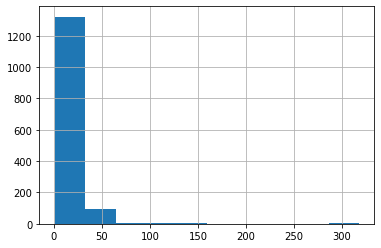

In [28]:
bikes['duration']['mean'].hist()

<AxesSubplot:>

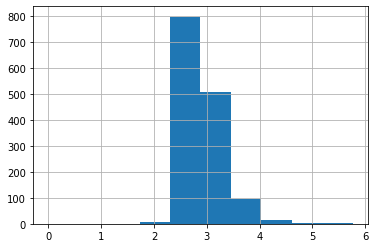

In [29]:
np.log(bikes['duration']['mean']).hist()